<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/example_flame_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import os.path
import requests
from numpy import genfromtxt

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [4]:
dataset = 'flame' # let us take Pathbased dataset as an example

url = "https://zerobytes.one/denmune_data/"
file_ext = ".txt"
ground_ext = "-gt"

dataset_url = url + dataset + file_ext
groundtruth_url = url + dataset + ground_ext  + file_ext

data_path = 'sample_data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
data_file = data_path + dataset + file_ext #  i.e. 'iris' + '.txt' ==> iris.txt

if  not os.path.isfile(data_path + dataset + file_ext):
    req = requests.get(dataset_url)
    with open(data_path + dataset + file_ext, 'wb') as f:
        f.write(req.content)
data = genfromtxt(data_file , delimiter='\t') 
        
if  not os.path.isfile(data_path + dataset + ground_ext + file_ext):
    req = requests.get(groundtruth_url)
    with open(data_path + dataset +  ground_ext + file_ext, 'wb') as f:
        f.write(req.content)    
data_labels =  genfromtxt(groundtruth_url , delimiter='\t') #  i.e. 'iris' + + '-gt + '.txt' ==> iris-gt.txt          

flame dataset: Groundtruht


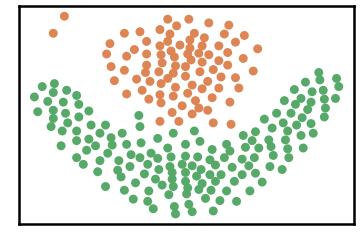



flame dataset: DenMune Clustering


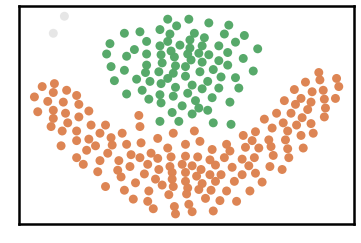

DenMune Analyzer
├── exec_time
│   ├── DenMune: 0.033
│   └── NGT: 0.006
├── n_clusters
│   ├── actual: 2
│   └── detected: 2
├── n_points
│   ├── dim: 2
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 2
│   ├── size: 240
│   ├── strong: 150
│   └── weak
│       ├── all: 90
│       ├── failed to merge: 2
│       └── succeeded to merge: 88
└── validity
    ├── ACC: 240
    ├── AMI: 1.0
    ├── ARI: 1.0
    ├── F1: 1.0
    ├── NMI: 1.0
    ├── completeness: 1.0
    └── homogeneity: 1.0

k= 8 F1 score is: 1.0


In [5]:
# Denmune's Paramaters
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_groundtrugh = True  # show plots on/off
show_noise = True # show noise and outlier on/off

knn = 8
dm = DenMune(data=data,  k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=False )
labels_pred = dm.fit_predict()

if show_groundtrugh:
    # Let us plot the groundtruth of this dataset
    print (dataset, "dataset: Groundtruht")
    dm.plot_clusters(labels=data_labels, ground=True)
    print('\n', "=====" * 20 , '\n')       

# Let us plot the results produced using DenMune
print (dataset, "dataset: DenMune Clustering")
dm.plot_clusters(labels=labels_pred, show_noise=show_noise)

validity = dm.validate_Clusters(labels_true=data_labels, labels_pred=labels_pred)
validity_key = "F1" 
# Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7       
print ('k=' , knn, validity_key , 'score is:', round(validity[validity_key],3))